# Activity 1 - Motion representation in image sequences

### Group3 (Jiye Lee, Eduardo Venegas Hernández) 






Import libraries

In [1]:
using Pkg
Pkg.add("Weave")
Pkg.add("Images")
Pkg.add("FileIO")
Pkg.add("Plots")
Pkg.add("Printf")

using Images
using FileIO
using Printf
using Plots
using Weave

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed YAML ──────────────── v0.4.8
   Installed StringEncodings ───── v0.3.5
   Installed DocStringExtensions ─ v0.8.6
   Installed Weave ─────────────── v0.10.9
   Installed Highlights ────────── v0.4.5
   Installed JLD2 ──────────────── v0.4.26
    Updating `~/.julia/environments/v1.8/Project.toml`
⌃ [44d3d7a6] + Weave v0.10.9
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [e2d170a0] + DataValueInterfaces v1.0.0
⌅ [ffbed154] ↓ DocStringExtensions v0.9.2 ⇒ v0.8.6
⌅ [eafb193a] + Highlights v0.4.5
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [033835bb] ↑ JLD2 v0.4.25 ⇒ v0.4.26
  [ffc61752] + Mustache v1.0.14
  [69024149] + StringEncodings v0.3.5
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.10.0
⌃ [44d3d7a6] + Weave v0.10.9
  [ddb6d928] + YAML v0.4.8
        Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by com

### 1. Write a Julia function readseq which reads in a sequence of images of uniform size and saves them as a 3D matrix I: I(x, y, t) denotes the pixel in image t at location (x, y)

In [3]:
function readseq(img_dir, num1, num2)
    #load first image
    img=load(Printf.format(Printf.Format(img_dir), num1))
    xsize=size(img,2)
    ysize=size(img,1)
    
    #make a 3D matrix 
    I=zeros(RGB{N0f8}, (xsize,ysize,num2-num1+1))
    for i in num1:num2
        I[:,:,i+1]=transpose(load(Printf.format(Printf.Format(img_dir), i)))
        # I[:,:,i]=permutedims(img, 2, 1)
    end
    I
end

B=readseq("zebra/zebra_%03i.png", 0, 62);
size(B)

(160, 120, 63)

### 2. Plot horizontal x-t sections

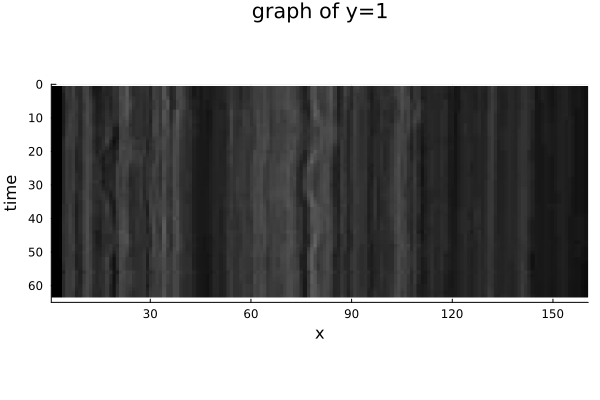

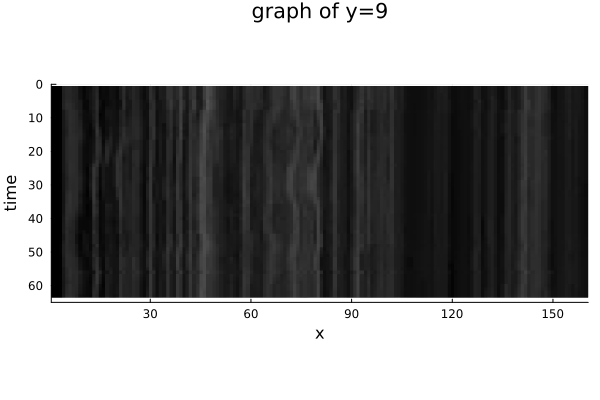

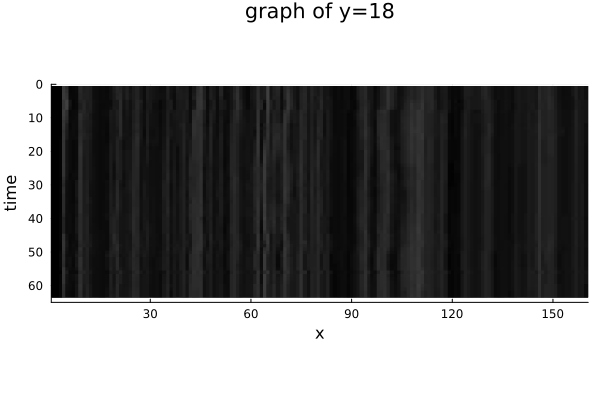

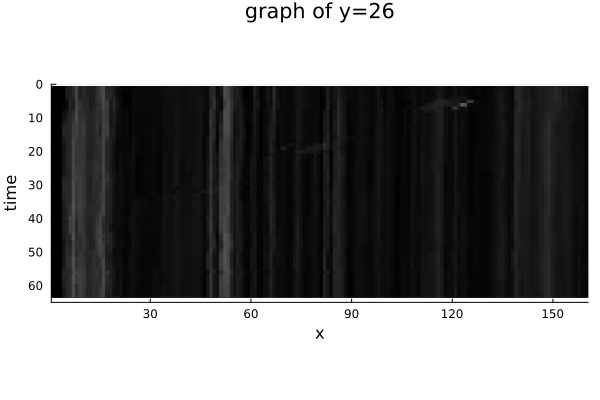

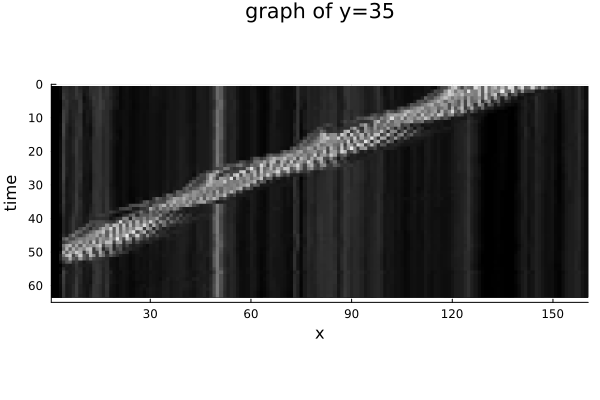

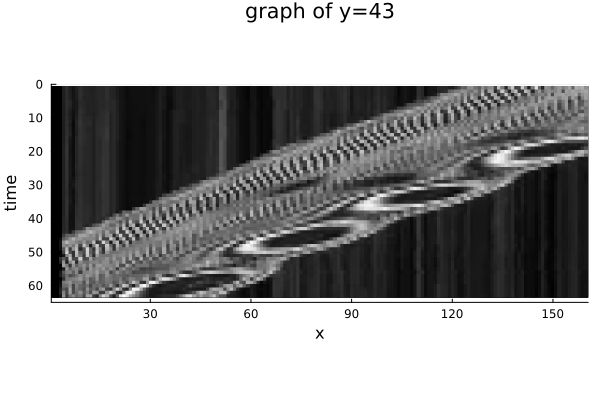

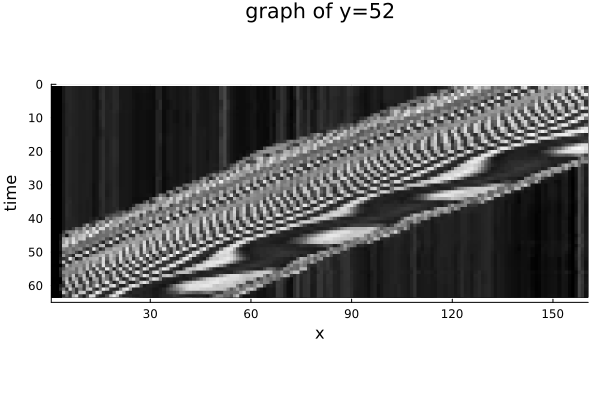

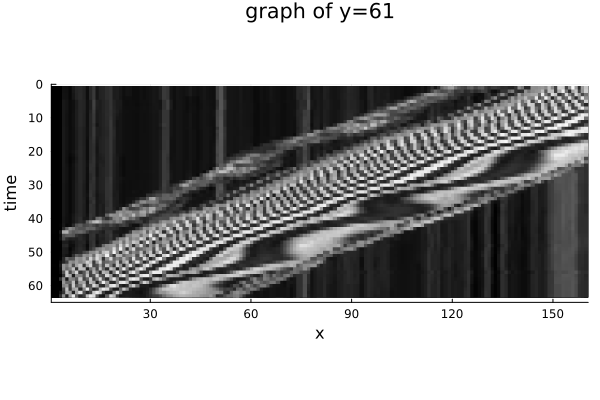

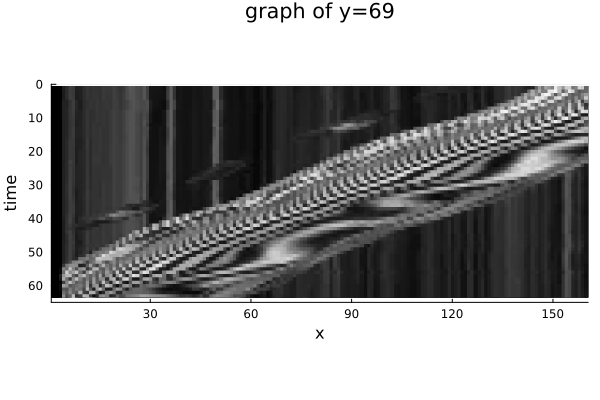

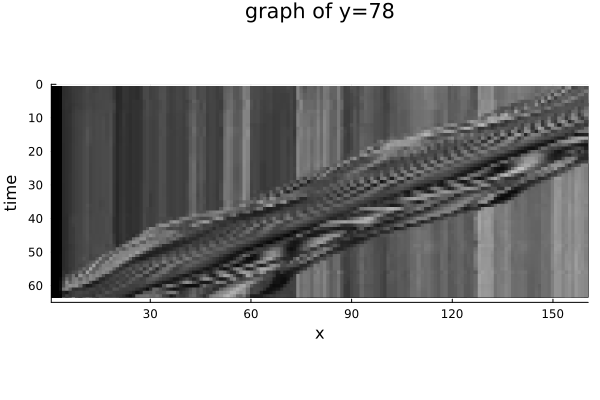

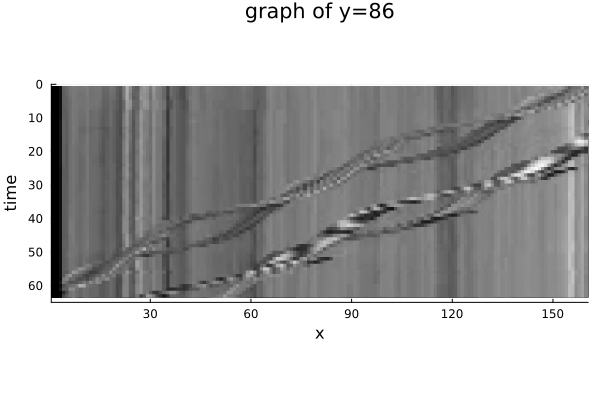

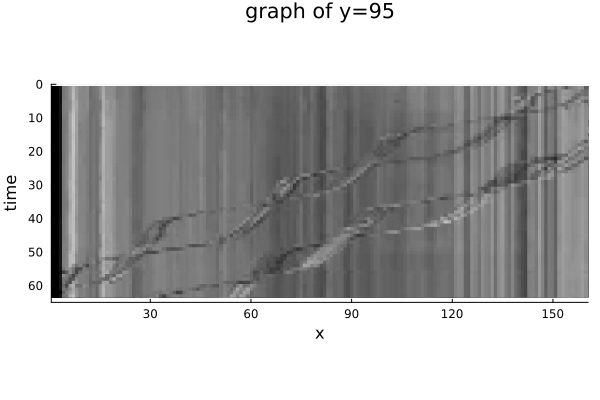

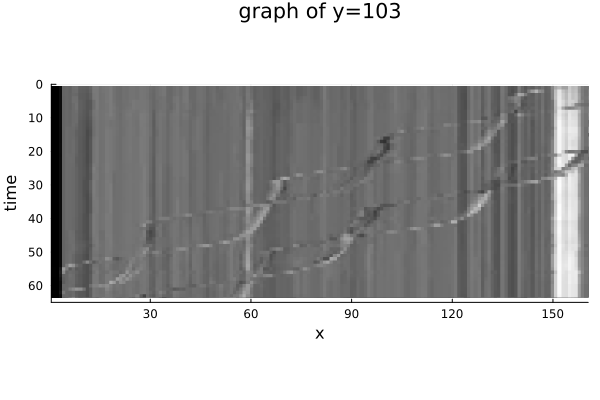

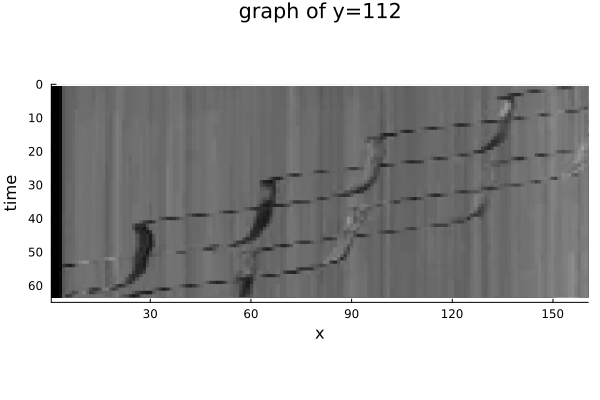

In [4]:
#plot x-t graph 

display(plot(transpose(B[:,1,:]),xlabel="x", ylabel="time", title="graph of y=1",ylim=(0,65)))
for i in 1:13
    counter=i*120÷14+1
    display(plot!(transpose(B[:,(i*120÷14+1),:]), xlabel="x", ylabel="time", title="graph of y=$counter",ylim=(0,65)))
end

### 3. Describe the patterns you observe in the x-t image sections and explain how these patterns arise

We can observe how the image moves through time because the graph is a stack of images. The patterns we observe are how the image changes over time. We can see how the image gets brighter and how the image changes shape. These patterns arise because the image is moving and changing over time. 

For example, In "graph of y=35" and "graph of y=43", each graph shows the movement of head and body of the zebra over time. Since the zebra moves from right to left, it can be seen that a thick line is formed from the upper right the lower left. 

In "graph of y=95", it shows the movemen of legs of the zebra. We can observe four lines drawing a zig zag pattern. This is because the zebra has four legs, and as the zebra walks, each of the two legs continues to intersect over time.

However, In "graph of y=1" we cannot observe a large change other than noice.
This is because the upper part of this image, the background, is motionless

# Activity 2 - Reichardt half- and full detector

Implement a Reichardt detector which detects a translatory motion of Delta = 5 pixels (rightward motion) in an image pair. As input, use the images line01.png and line02.png, which show two subsequent time steps.

1. Implement a simple half-detector which compares the brightness of pixel x in image 1 to the brightness of pixel x+5 in image 2.

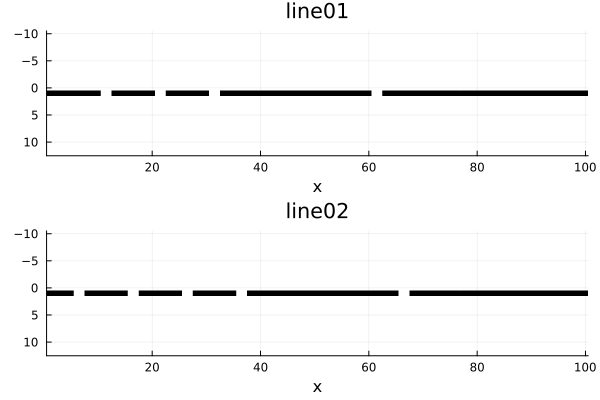

In [5]:
# Load the images
img1 = load("line/line01.png")
img2 = load("line/line02.png")

# Convert the images to a black and white image
img1 = Gray.(img1)
img2 = Gray.(img2)

# Show the images
line1 = plot(img1, title="line01", legend=false, xlabel="x")
line2 = plot(img2, title="line02", legend=false, xlabel="x")
plot(line1, line2, layout=(2, 1))

In [7]:
x = 1
Delta = 5

# Print brightness of pixel x and pixel x+Delta in image 2
println("Brightness of pixel x in image 1: ", img1[1, x])
println("Brightness of pixel x+Delta in image 2: ", img2[1, x+Delta])

Brightness of pixel x in image 1: Gray{N0f8}(0.0)
Brightness of pixel x+Delta in image 2: Gray{N0f8}(1.0)


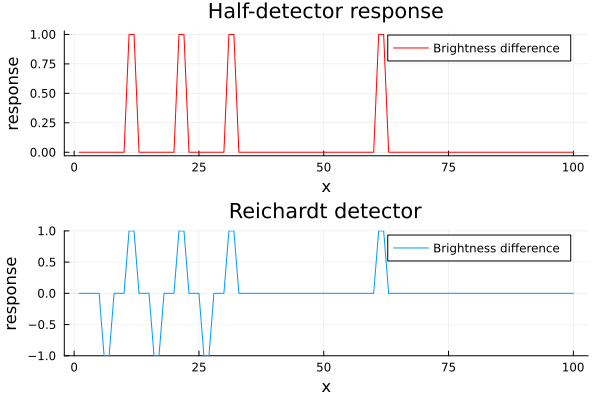

In [8]:
# Create an array of brightness differences
right = zeros(100)
left = zeros(100)
diff = zeros(100)

# Calculate the brightness difference for each pixel
for x in 1:(100-Delta)
    right[x] = img1[1, x] * img2[1, x+Delta]
    left[x] = img1[1, x+Delta] * img2[1, x]
    diff[x] = right[x] - left[x]
end

# Plot the response
plot_right = plot(right, label="Brightness difference", color="red", title="Half-detector response", xlabel="x", ylabel="response")
plot_diff = plot(diff, ylims=(-1, 1), label="Brightness difference", title="Reichardt detector", xlabel="x", ylabel="response")
plot(plot_right, plot_diff, layout=(2, 1))

### 4. Apply this detector to the image pair and explain its response properties

The basic idea is that when one pixel is in the dark of an object and the other is not, the difference in the intensity of light received by the two pixels will change. This change can be used to detect the movement of the object.
In our experiments we first detected a movement to the right using a half detector where we can see a response 3 times at the start of the lines. The first line has 3 white pixels in the first 40 pixels of the image and the second image has 4 similar pixels but shifted both to the right and to the left depending on the perspective, also the is a pixel in the position 60 that also looks that was shifted to the right, therfore a movement to the right is detected. Then we implemented a left detector that generated 3 responses for these exact same pixels, so a movement to the left is detected by this system. Finally we combined both detectors and we gave the left signal a negative value to differentiate it. The final plot has 4 responses to the right and 3 to the left.
<br/>
Also the signal is protected against flickering by comparing both detectors, if both gave the same signal then the signal is rejected, if not then the signal is accepted, since an object cannot move left and right at the same time.
On the other hand the detector is not very sensitive to the movement of the object, it only detects a movement of 5 pixels, so if the object falls in those other pixels that are not being read the detector will not detect it.

In [12]:
filename = normpath("sh01ex01.ipynb")
weave(filename, out_path = :pwd)

┌ Info: Weaving chunk 1 from line 0
│   progress = 0.0
└ @ Weave /home/lalo/.julia/packages/Weave/ijcKV/src/run.jl:66
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
┌ Info: Weaving chunk 2 from line 0
│   progress = 0.14285714285714285
└ @ Weave /home/lalo/.julia/packages/Weave/ijcKV/src/run.jl:6